### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

In [2]:
#Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.
shape = 1
sample = gamma.rvs(a=shape, size=1000, random_state=0)

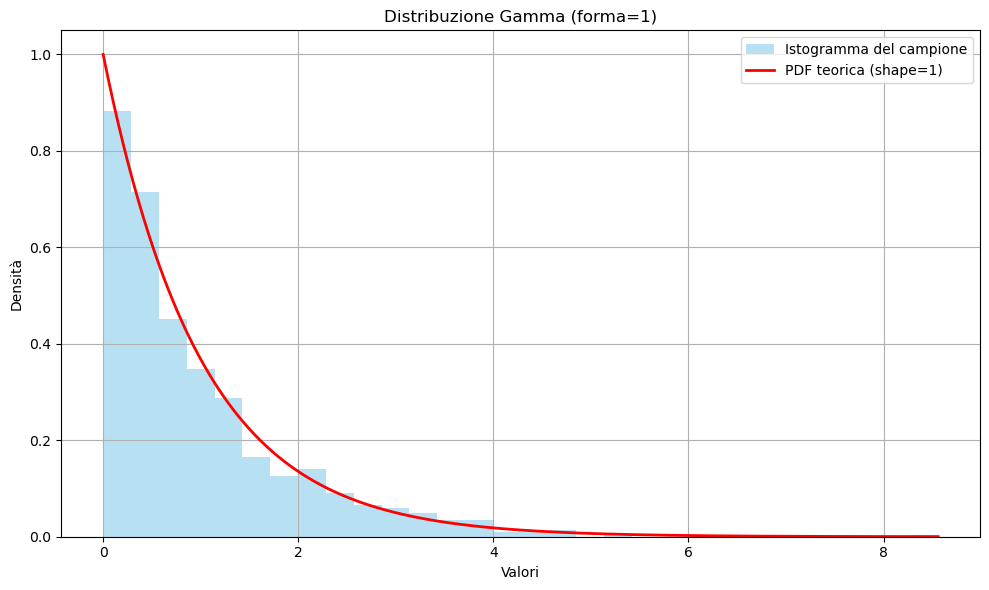

In [3]:
#Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.
x = np.linspace(0, np.max(sample), 1000)
pdf = gamma.pdf(x, a=shape)

plt.figure(figsize=(10, 6))
plt.hist(sample, bins=30, density=True, alpha=0.6, color='skyblue', label='Istogramma del campione')
plt.plot(x, pdf, 'r-', lw=2, label='PDF teorica (shape=1)')
plt.title("Distribuzione Gamma (forma=1)")
plt.xlabel("Valori")
plt.ylabel("Densità")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
#Stima il parametro di forma dal campione usando fit
 
shape_hat, loc_hat, scale_hat = gamma.fit(sample)

print(f"Stima dei parametri -> shape: {shape_hat:.4f}, loc: {loc_hat:.4f}, scale: {scale_hat:.4f}")


Stima dei parametri -> shape: 0.9745, loc: 0.0005, scale: 1.0274


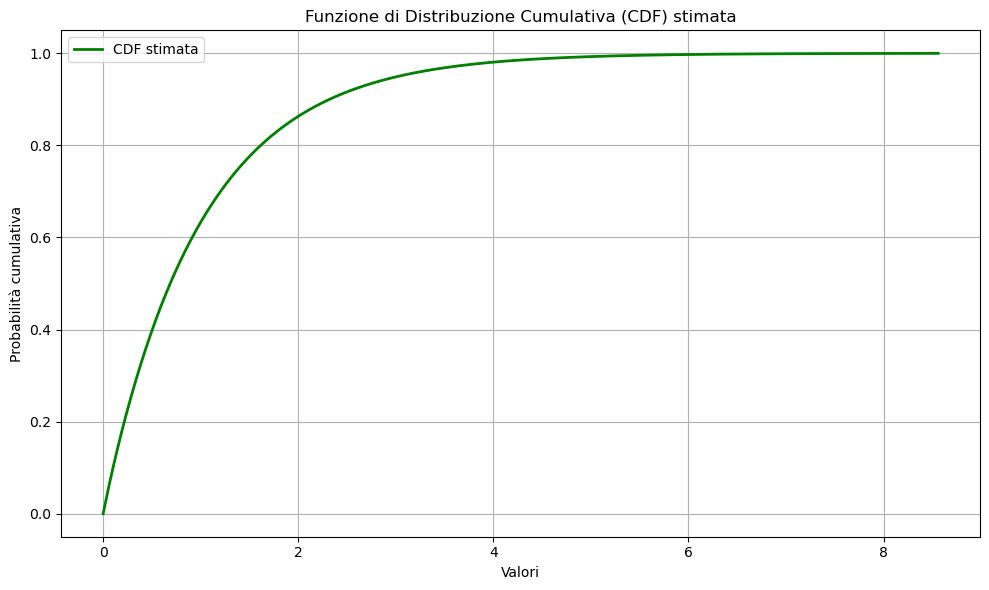

In [5]:
#Traccia la funzione di distribuzione cumulativa (CDF)
cdf = gamma.cdf(x, a=shape_hat, loc=loc_hat, scale=scale_hat)
plt.figure(figsize=(10, 6))
plt.plot(x, cdf, 'g-', lw=2, label='CDF stimata')
plt.title("Funzione di Distribuzione Cumulativa (CDF) stimata")
plt.xlabel("Valori")
plt.ylabel("Probabilità cumulativa")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


                        
                        



In [6]:
# Calcola la varianza del campione
variance_sample = np.var(sample)
print(f"Varianza del campione: {variance_sample:.4f}")
        

Varianza del campione: 1.0590


### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

Text(0, 0.5, 'Min and max temperature')

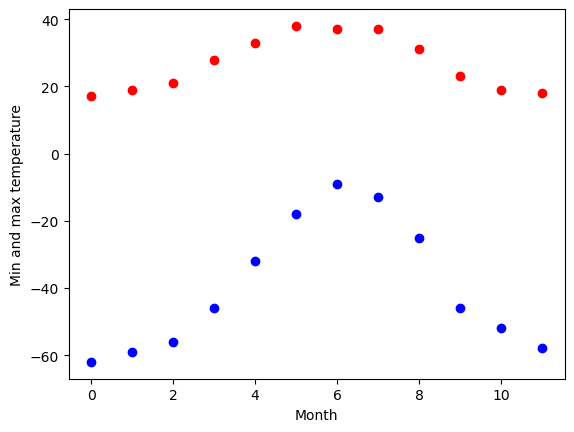

In [7]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")


In [31]:
pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 1.3 MB/s eta 0:00:08
   -- ------------------------------------- 0.8/10.7 MB 1.2 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/10.7 MB 1.3 MB/s eta 0:00:08
   ---- ----------------------------------- 1.3/10.7 MB 1.3 MB/s eta 0:00:08
   ---- ----------------------------------- 1.3/10.7 MB 1.3 MB/s eta 0:00:08
   ----- ---------------------------------- 1.6/10.7 MB 1.0 MB/s eta 0:00:10
   ----- ---------------------------------- 1.6/10.7 MB 1.0 MB/s eta 0:00:10
   ----- ---------------------------------- 1.6/10.7 MB 1.0 MB/s eta 0:00:10
   ------ --------------------------------- 1.8/10.7 MB 780.6 kB/s eta 0:00:12
   ------- -------------------------------- 2.1/10.7 MB 827.0 kB/s eta 0:00:11
   -------- ----

In [23]:
import numpy as np
import matplotlib.pyplot as plt

temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(12)

In [24]:
# Fit polinomiale
deg = 4
coeffs_max = np.polyfit(months, temp_max, deg)
coeffs_min = np.polyfit(months, temp_min, deg)

# Valori stimati
fit_max = np.polyval(coeffs_max, months)
fit_min = np.polyval(coeffs_min, months)

In [32]:
# Temperature massime
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_max = mean_absolute_error(temp_max, fit_max)
rmse_max = np.sqrt(mean_squared_error(temp_max, fit_max))

# Temperature minime
mae_min = mean_absolute_error(temp_min, fit_min)
rmse_min = np.sqrt(mean_squared_error(temp_min, fit_min))

print(f"MAE Max: {mae_max:.2f}, RMSE Max: {rmse_max:.2f}")
print(f"MAE Min: {mae_min:.2f}, RMSE Min: {rmse_min:.2f}")

MAE Max: 0.78, RMSE Max: 0.93
MAE Min: 2.96, RMSE Min: 3.49


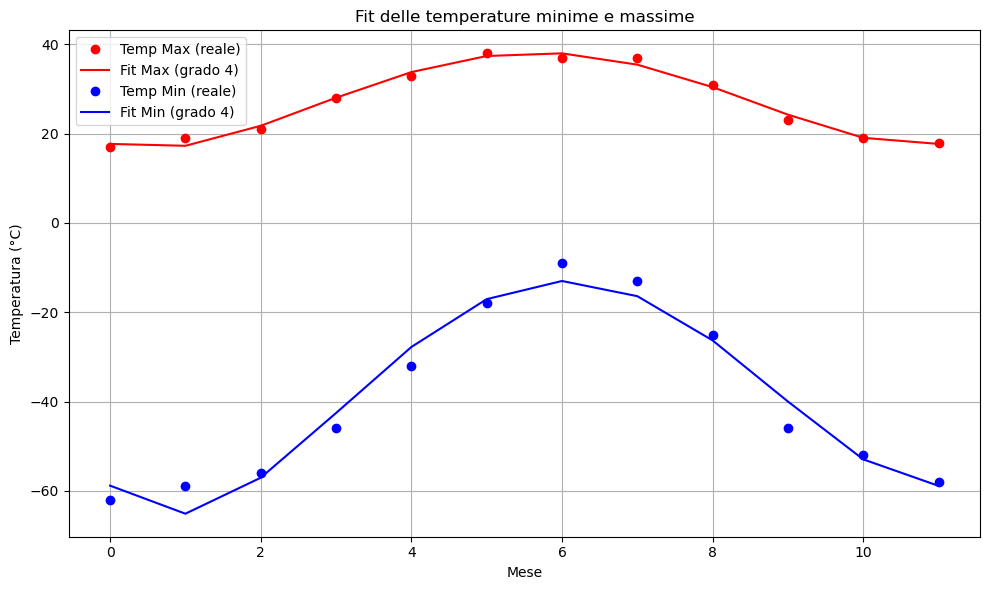

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(months, temp_max, "ro", label="Temp Max (reale)")
plt.plot(months, fit_max, "r-", label="Fit Max (grado 4)")

plt.plot(months, temp_min, "bo", label="Temp Min (reale)")
plt.plot(months, fit_min, "b-", label="Fit Min (grado 4)")

plt.xlabel("Mese")
plt.ylabel("Temperatura (°C)")
plt.title("Fit delle temperature minime e massime")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

In [2]:
import pandas as pd

# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
df


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


Intercetta (b0): 29.59985475616395
Coefficiente angolare (b1): -0.041215119962786144


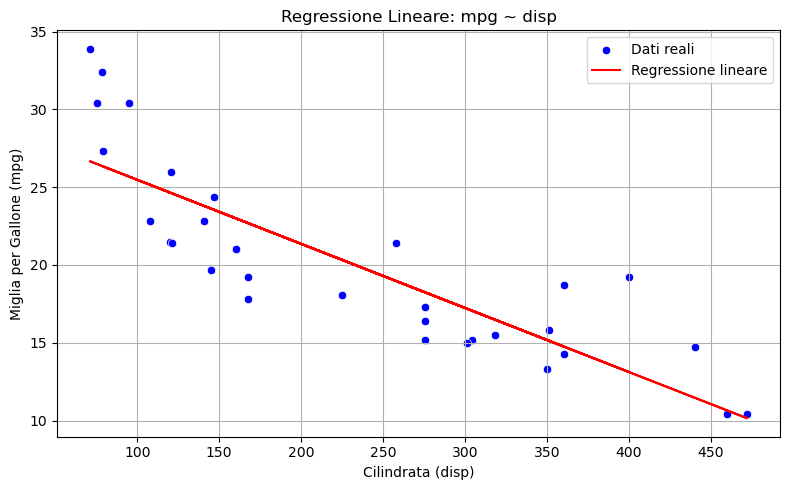

In [36]:

# Separazione delle variabili indipendente e dipendente
X = df[['disp']]  # indipendente: cilindrata
y = df['mpg']     # dipendente: consumo

# Creazione del modello
model = LinearRegression()
model.fit(X, y)

# Coefficienti
print(f"Intercetta (b0): {model.intercept_}")
print(f"Coefficiente angolare (b1): {model.coef_[0]}")

# Predizioni
y_pred = model.predict(X)

# Visualizzazione del modello di regressione
plt.figure(figsize=(8, 5))
sns.scatterplot(x='disp', y='mpg', data=df, color='blue', label='Dati reali')
plt.plot(df['disp'], y_pred, color='red', label='Regressione lineare')
plt.title('Regressione Lineare: mpg ~ disp')
plt.xlabel('Cilindrata (disp)')
plt.ylabel('Miglia per Gallone (mpg)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
